In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset
from torchvision import datasets, transforms
from PIL import Image
from sklearn.metrics import accuracy_score
from torch.utils.data.sampler import SubsetRandomSampler
import torch
import torch.nn as nn
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset A/training-a.csv')#reading csv
df = df[['filename', 'digit']]#dropping the columns

In [4]:
#Hyper-parameter initialization
batch_size = 20
iteration = 20000#num_iters
hidden_layer = 6
input_dim = 28*28 # num_features = 784
hidden_node = 200 # num_hidden
output_dim = 10
learning_rate = 0.01
startingEpoch = 0
loss = []
iter = 0
epochs = 25 #iteration / (len(x_train) / batch_size)#num_epochs 
startingEpoch = 1
iter = 1

In [7]:
test_size = 0.2
num_train = len(data)
indices = list(range(num_train))
np.random.seed(42)
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
train_idx, test_idx = indices[split:], indices[:split]
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

num_epochs = 25
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(data, batch_size=batch_size, sampler=train_sampler)
test_loader = torch.utils.data.DataLoader(data, batch_size=batch_size,sampler=test_sampler)

In [5]:
#Feature Extraction
class DatasetTransform(Dataset):
  def __init__(self, df, path, transform):
    self.data = df
    self.path = path
    self.transform = transform
        
  def __len__(self):
    return len(self.data)
    
  def __getitem__(self, index):
    item = self.data.iloc[index]
    path = self.path + "/" + item[0]
    image = Image.open(path).convert('L')
    label = item[1]
    image = self.transform(image)
    return image, label

dataset_transform = transforms.Compose([
  transforms.Resize(28),
  transforms.ToTensor(),                                                                                                                                                                                                                                                                                                                                                                                                                         
  transforms.Normalize((0.5,), (0.5,))
])

data  = DatasetTransform(df, '/content/drive/MyDrive/Colab Notebooks/Dataset A/training-a', dataset_transform)

print("Training data are : ",len(data))

Training data are :  19702


In [6]:
class Model(nn.Module):
  def __init__(self, input_size, output_dim, hidden_node):
    super().__init__()
    self.L1 = nn.Linear(input_size, hidden_node)
    self.T1 = nn.Tanh()

    self.L2 = nn.Linear(hidden_node, hidden_node)
    self.T2 = nn.Tanh()

    self.L3 = nn.Linear(hidden_node, hidden_node)
    self.T3 = nn.Tanh()

    self.L4 = nn.Linear(hidden_node, hidden_node)
    self.T4 = nn.Tanh()

    self.L5 = nn.Linear(hidden_node, hidden_node)
    self.T5 = nn.Tanh()

    self.L6 = nn.Linear(hidden_node, hidden_node)
    self.T6 = nn.Tanh()

    self.Linear_output = nn.Linear(hidden_node, output_dim)   
    
  def forward(self, x):
    out  = self.L1(x)
    out = self.T1(out)

    out  = self.L2(out)
    out = self.T2(out)

    out  = self.L3(out)
    out = self.T3(out)

    out  = self.L4(out)
    out = self.T4(out)

    out  = self.L5(out)
    out = self.T5(out)

    out  = self.L6(out)
    out = self.T6(out)

    final  = self.Linear_output(out)
    return final

In [8]:
model = Model(input_size = input_dim, output_dim = output_dim, hidden_node = hidden_node)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)#moving to GPU
print(model)

Model(
  (L1): Linear(in_features=784, out_features=200, bias=True)
  (T1): Tanh()
  (L2): Linear(in_features=200, out_features=200, bias=True)
  (T2): Tanh()
  (L3): Linear(in_features=200, out_features=200, bias=True)
  (T3): Tanh()
  (L4): Linear(in_features=200, out_features=200, bias=True)
  (T4): Tanh()
  (L5): Linear(in_features=200, out_features=200, bias=True)
  (T5): Tanh()
  (L6): Linear(in_features=200, out_features=200, bias=True)
  (T6): Tanh()
  (Linear_output): Linear(in_features=200, out_features=10, bias=True)
)


In [9]:
criterion = nn.CrossEntropyLoss()
params = list(model.parameters()) 
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

L = []
A = []
ac = 0

Streaming output truncated to the last 5000 lines.
14035 complete
14036 complete
14037 complete
14038 complete
14039 complete
14040 complete
14041 complete
14042 complete
14043 complete
14044 complete
14045 complete
14046 complete
14047 complete
14048 complete
14049 complete
14050 complete
14051 complete
14052 complete
14053 complete
14054 complete
14055 complete
14056 complete
14057 complete
14058 complete
14059 complete
14060 complete
14061 complete
14062 complete
14063 complete
14064 complete
14065 complete
14066 complete
14067 complete
14068 complete
14069 complete
14070 complete
14071 complete
14072 complete
14073 complete
14074 complete
14075 complete
14076 complete
14077 complete
14078 complete
14079 complete
14080 complete
14081 complete
14082 complete
14083 complete
14084 complete
14085 complete
14086 complete
14087 complete
14088 complete
14089 complete
14090 complete
14091 complete
14092 complete
14093 complete
14094 complete
14095 complete
14096 complete
14097 complete
1409

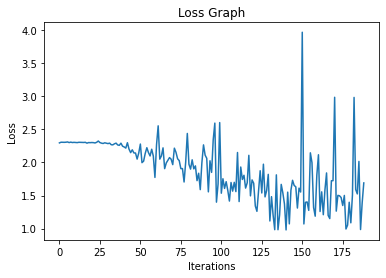

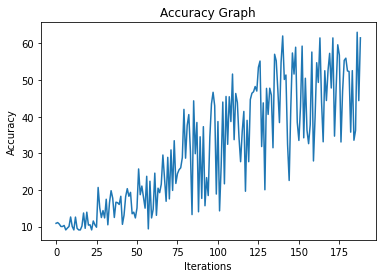

In [10]:
for epoch in range(startingEpoch, epochs):      
  for i, (images, labels) in enumerate(train_loader):
    print(str(iter) + ' complete')
    images = images.view(-1, 28*28).to(device)
    labels = labels.to(device)
    optimizer.zero_grad()#solving zero grad problem
    outputs = model(images)#output of model
    loss = criterion(outputs, labels)#compare actual output with predicted and calculate the loss

    loss.backward()#back-propagation
    optimizer.step()#update the weights
    iter += 1

    if iter % 100 == 0:  #calculate accuracy after 100 iterations    
      counter = 0
      total = 0
      for images, labels in test_loader:#load the testing data
        images = images.view(-1, 28*28).to(device)
        outputs = model(images)#sending the input to neural network
        _, predicted = torch.max(outputs, 1)#maximum prediction
        total += labels.size(0)
        if torch.cuda.is_available():
          counter += (predicted.cpu() == labels.cpu()).sum() 
        else:
          counter += (predicted == labels).sum()

      accuracy = 100 * counter.item()/total
      a = loss.item()
      A.append(accuracy)
      if ac < accuracy:
        ac = accuracy
      L.append(a)
      print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))
      print(ac)

#plotting the loss curve
plt.title("Loss Graph")
plt.plot(L)
plt.ylabel('Loss')
plt.xlabel('Iterations')
plt.show()

plt.title("Accuracy Graph")
plt.plot(A)
plt.ylabel('Accuracy')
plt.xlabel('Iterations')
plt.show()

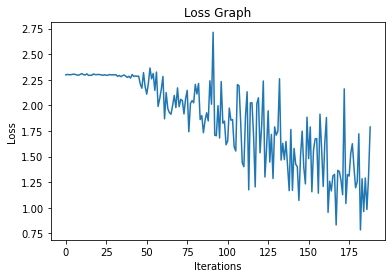

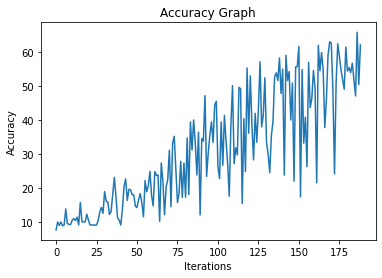

65.71065989847716


In [ ]:
plt.title("Loss Graph")
plt.plot(L)
plt.ylabel('Loss')
plt.xlabel('Iterations')
plt.show()

plt.title("Accuracy Graph")
plt.plot(A)
plt.ylabel('Accuracy')
plt.xlabel('Iterations')
plt.show()
print(ac)

**Answer to the Question no: 2**

In [ ]:
#Hyper-parameter initialization
batch_size = 128
iteration = 20000#num_iters
hidden_layer = 6
input_dim = 28*28 # num_features = 784
hidden_node = 200 # num_hidden
output_dim = 10
learning_rate = 0.01
startingEpoch = 0
loss = []
iter = 0
epochs = 25
startingEpoch = 1
iter = 1

**Answer to the Question no: 3**

In [ ]:
#Function for checking the test data accuracy
def checking_prediction(test_loader):
  model_predicted = torch.tensor([], dtype=torch.int32)
  actual_list = torch.tensor([], dtype=torch.int32)
  for i, (images, labels) in enumerate(test_loader):
    images = images.view(-1, 28*28).to(device)
    labels = labels.to(device)

    # Forward pass only to get logits/output
    outputs = model(images)

    # Get predictions from the maximum value
    _, predictions = torch.max(outputs, 1)
    model_predicted = torch.cat((model_predicted, predictions.cpu()), dim = 0)
    actual_list = torch.cat((actual_list.cpu(), labels.cpu()), dim = 0).to(device)
  return model_predicted, actual_list.cpu()

In [ ]:
#reading the 2nd dataset
train_dataset2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset_2/Dataset_2/verification_train.csv')
test_dataset2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset_2/Dataset_2/verification_test.csv')

In [ ]:
#Dropping the 'label' column
x_train2 = train_dataset2.drop("label", axis=1).values.astype(np.uint8)
y_train2 = train_dataset2["label"].values.astype(np.uint8)

x_test2 = test_dataset2.drop("label", axis=1).values.astype(np.uint8)
y_test2 = test_dataset2["label"].values.astype(np.uint8)

In [ ]:
#Feature extraction from 2nd dataset
class second_dataset(Dataset):
  def __init__(self, X, y, transforms):
    self.X = X
    self.y = y
    self.transforms = transforms

  def __len__(self):
    return self.X.shape[0]

  def __getitem__(self, idx):
    X = np.reshape(self.X[idx], (28, 28, 1))
    X = self.transforms(X)
    return X, self.y[idx]

#Calling the method
new_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [ ]:
#get the dataset in two parts of training and testing
train_dataset = second_dataset(X=x_train2, y=y_train2, transforms=new_transform)
test_dataset = second_dataset(X=x_test2, y=y_test2, transforms=new_transform)

num_epochs =  10

# prepare loaders
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=False) 

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

y_pred, y_true = checking_prediction(test_loader)

In [ ]:
#Calling the model
model2 = Model2(input_size = input_dim,output_dim = output_dim, hidden_node = hidden_node)
# To enable GPU
model.to(device)

Model(
  (L1): Linear(in_features=784, out_features=200, bias=True)
  (T1): Tanh()
  (L2): Linear(in_features=200, out_features=200, bias=True)
  (T2): Tanh()
  (L3): Linear(in_features=200, out_features=200, bias=True)
  (T3): Tanh()
  (L4): Linear(in_features=200, out_features=200, bias=True)
  (T4): Tanh()
  (L5): Linear(in_features=200, out_features=200, bias=True)
  (T5): Tanh()
  (L6): Linear(in_features=200, out_features=200, bias=True)
  (T6): Tanh()
  (Linear_output): Linear(in_features=200, out_features=10, bias=True)
)

In [ ]:
#Cross entropy loss function
criterion = nn.CrossEntropyLoss()
params = list(model.parameters()) 
#SGD optimizer
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
#RMSprop optimizer
#optimizer = torch.optim.RMSprop(model.parameters(), lr = learning_rate)
#Lists for storing loss and accuracy
L = []
A = []
ac = 0

In [ ]:
for epoch in range(startingEpoch, epochs):      
  for i, (images, labels) in enumerate(train_loader):
    print(str(iter) + ' complete')
    images = images.view(-1, 28*28).to(device)
    labels = labels.to(device).type(torch.LongTensor)
    labels = labels.to(device)
    optimizer.zero_grad()#solving zero grad problem
    outputs = model(images).cpu()#output of model
    loss = criterion(outputs, labels)#compare actual output with predicted and calculate the loss

    loss.backward()#back-propagation
    optimizer.step()#update the weights
    iter += 1

    if iter % 100 == 0:  #calculate accuracy after 100 iterations    
      counter = 0
      total = 0
      for images, labels in test_loader:#load the testing data
        images = images.view(-1, 28*28).to(device)
        outputs = model(images)#sending the input to neural network
        _, predicted = torch.max(outputs, 1)#maximum prediction
        total += labels.size(0)
        if torch.cuda.is_available():
          counter += (predicted.cpu() == labels.cpu()).sum() 
        else:
          counter += (predicted == labels).sum()

      accuracy = 100 * counter.item()/total
      a = loss.item()
      A.append(accuracy)
      if ac < accuracy:
        ac = accuracy
      L.append(a)
      print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))
      print(ac)

#plotting the loss curve
plt.title("Loss Graph")
plt.plot(L)
plt.ylabel('Loss')
plt.xlabel('Iterations')
plt.show()

plt.title("Accuracy Graph")
plt.plot(A)
plt.ylabel('Accuracy')
plt.xlabel('Iterations')
plt.show()

Streaming output truncated to the last 5000 lines.
17098 complete
17099 complete
Iteration: 17100. Loss: 2.330158233642578. Accuracy: 10.0
10.01
17100 complete
17101 complete
17102 complete
17103 complete
17104 complete
17105 complete
17106 complete
17107 complete
17108 complete
17109 complete
17110 complete
17111 complete
17112 complete
17113 complete
17114 complete
17115 complete
17116 complete
17117 complete
17118 complete
17119 complete
17120 complete
17121 complete
17122 complete
17123 complete
17124 complete
17125 complete
17126 complete
17127 complete
17128 complete
17129 complete
17130 complete
17131 complete
17132 complete
17133 complete
17134 complete
17135 complete
17136 complete
17137 complete
17138 complete
17139 complete
17140 complete
17141 complete
17142 complete
17143 complete
17144 complete
17145 complete
17146 complete
17147 complete
17148 complete
17149 complete
17150 complete
17151 complete
17152 complete
17153 complete
17154 complete
17155 complete
17156 complete


KeyboardInterrupt: ignored

In [ ]:
plt.title("Loss Graph")
plt.plot(L)
plt.ylabel('Loss')
plt.xlabel('Iterations')
plt.show()

plt.title("Accuracy Graph")
plt.plot(A)
plt.ylabel('Accuracy')
plt.xlabel('Iterations')
plt.show()

In [ ]:
class Model2(nn.Module):
  def __init__(self, input_size, output_dim, hidden_node):
    super().__init__()
    self.L1 = nn.Linear(input_size, hidden_node)
    self.T1 = nn.ReLU()

    self.L2 = nn.Linear(hidden_node, hidden_node)
    self.T2 = nn.ReLU()

    self.L3 = nn.Linear(hidden_node, hidden_node)
    self.T3 = nn.ReLU()

    self.L4 = nn.Linear(hidden_node, hidden_node)
    self.T4 = nn.ReLU()

    self.L5 = nn.Linear(hidden_node, hidden_node)
    self.T5 = nn.ReLU()

    self.L6 = nn.Linear(hidden_node, hidden_node)
    self.T6 = nn.ReLU()

    self.Linear_output = nn.Linear(hidden_node, output_dim)   
    
  def forward(self, x):
    out  = self.L1(x)
    out = self.T1(out)

    out  = self.L2(out)
    out = self.T2(out)

    out  = self.L3(out)
    out = self.T3(out)

    out  = self.L4(out)
    out = self.T4(out)

    out  = self.L5(out)
    out = self.T5(out)

    out  = self.L6(out)
    out = self.T6(out)

    final  = self.Linear_output(out)
    return final